<a href="https://colab.research.google.com/github/MarceloCapeletti/MarceloCapeletti/blob/main/analisys_of_hydraulic_energy_crisis_period_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# National Interconnected System Management during Hydraulic Energy Crisis Period 2021

Este Notebook visa análisar o comportamento do Sistema Interligado Nacional (SIN) durante a Crise Energética de 2021. Com objetivo de análisar o comportamento das diversas váriaveis que compõe a operação do Sistema, como a energia armazenada nos Subsistemas, a cota de água nos principais reservatórios, o armazenamento de energia hidroelétricam, a variação do Preço de Energia (PLD e CMO), a energia natural afluente, o intercambio de energia entre os subsistemas, a carga elétrica, entre outros.

Fontes dos dados utilizados:

Do histórico de operação do Operador Nacional do Sistema (ONS),
Agencia Nacional de Aguas (ANA) e Câmera de Comercialização de Energia Elétrica (CCEE).

 @autor: Marcelo Bruno Capeletti


In [ ]:
#----------------------------------------------------------------------------------------------------------------
# IMPORTAÇÃO DAS BIBLIOTECAS
#----------------------------------------------------------------------------------------------------------------

# BIBLIOTECAS DE MANIPULAÇÃO DE DADOS

import pandas as pd

# BIBLIOTECAS DE PLOT DOS DADOS

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [ ]:
#----------------------------------------------------------------------------------------------------------------
# FUNÇÃO PARA CUSTOMIZAR PLOT
#----------------------------------------------------------------------------------------------------------------

def Custom_Ax(ax, ylabel_name='', ylabel_size=16, xlabel_name='', xlabel_size=16):
    """
    Customizando Axis Matplotlib.

    Parameters
    ----------
    ax : TYPE
        DESCRIPTION.
    ylabel_name : TYPE, optional
        DESCRIPTION. The default is ''.
    ylabel_size : TYPE, optional
        DESCRIPTION. The default is 16.
    xlabel_name : TYPE, optional
        DESCRIPTION. The default is ''.
    xlabel_size : TYPE, optional
        DESCRIPTION. The default is 16.

    Returns
    -------
    ax : TYPE
        DESCRIPTION.

    """
    ax.set_ylabel(ylabel_name, fontdict={'fontsize': ylabel_size})
    ax.set_xlabel(xlabel_name, fontdict={'fontsize': xlabel_size})
    ax.grid(color='black', linestyle='-', linewidth=1, alpha=.5)
    ax.grid(which='minor', axis="x", color="black", alpha=.2, linewidth=.5, linestyle="--")
    ax.grid(which='minor', axis="y", color="black", alpha=.2, linewidth=.5, linestyle="--")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(visible=True, which='major', axis="x", color="black", alpha=1, linewidth=.5, linestyle="-")
    ax.grid(visible=True, which='major', axis="y", color="black", alpha=1, linewidth=.5, linestyle="-")

    return ax


Neste trabalho iremos observar o comportamento das propriedades do Sistema Interligado Nacional (SIN), que são importantes para identificar o desdobramentos da crise hídrica intensificada nos meses de período seco de 2021, as váriaveis a serem analisadas serão as cotas dos principais reservatórios, carga elétrica, energia armazenada, preços de energia, entre outras apresentadas no decorrer do trabalho. Neste trabalho teremos uma abordagem bastante abrangente, análisando as mais diversas váriaveis atreladas ao sistema elétrico.


## Cotas dos principais reservatórios

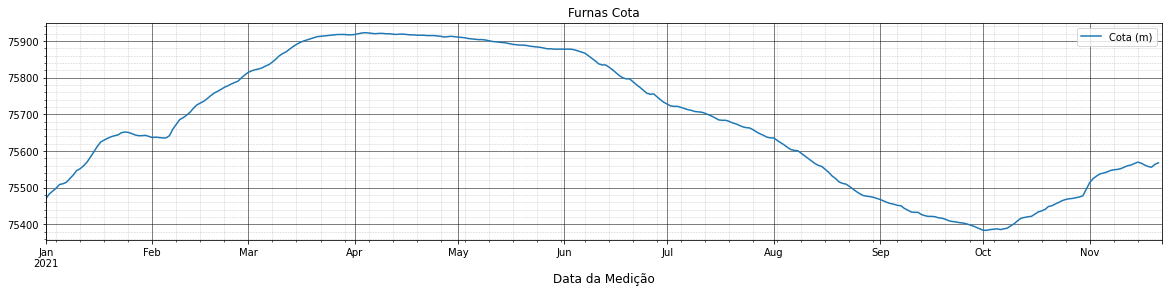

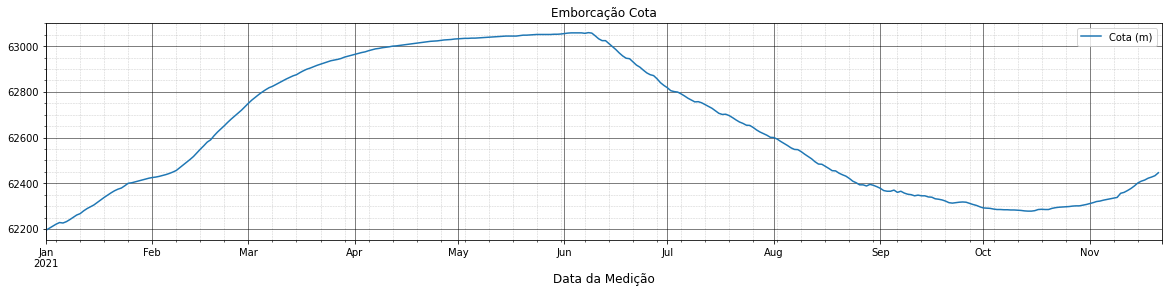

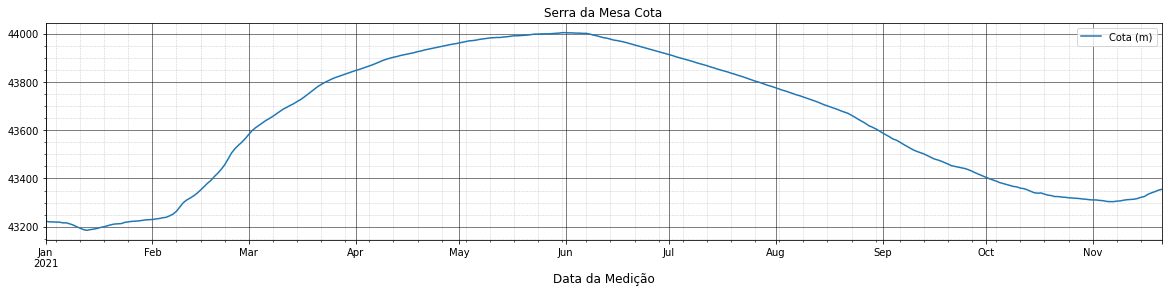

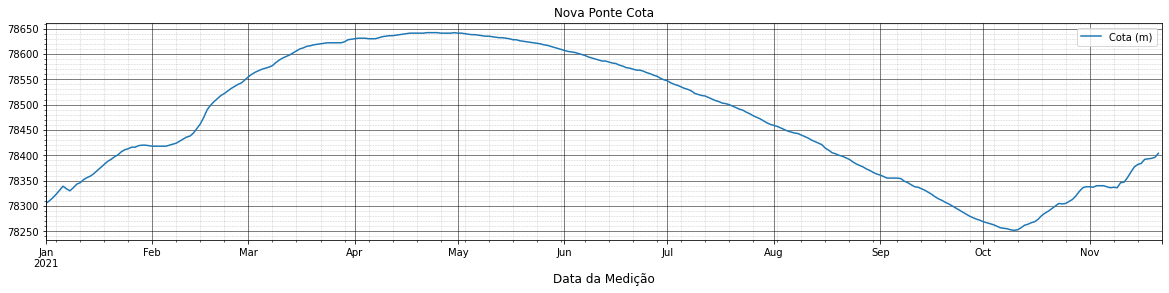

In [ ]:
df_furnas = pd.read_html(r"/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Histórico_FURNAS.xls")[0]
df_emborcacao = pd.read_html(r"/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Histórico_EMBORCAÇÃO.xls")[0]
df_serra = pd.read_html(r"/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Histórico_SERRA DA MESA.xls")[0]
df_ponte = pd.read_html(r"/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Histórico_NOVA PONTE.xls")[0]

df_furnas['Data da Medição'] = pd.to_datetime(df_furnas['Data da Medição'], format='%d/%m/%Y')
df_emborcacao['Data da Medição'] = pd.to_datetime(df_emborcacao['Data da Medição'], format='%d/%m/%Y')
df_serra['Data da Medição'] = pd.to_datetime(df_serra['Data da Medição'], format='%d/%m/%Y')
df_ponte['Data da Medição'] = pd.to_datetime(df_ponte['Data da Medição'], format='%d/%m/%Y')


fig, ax = plt.subplots()

ax = Custom_Ax(ax, xlabel_size=12)

df_furnas.plot(kind='line', x='Data da Medição', y='Cota (m)', ax=ax,
               title='Furnas Cota', grid=True, figsize=(20,4))


fig, ax = plt.subplots()

ax = Custom_Ax(ax, xlabel_size=12)

df_emborcacao.plot(kind='line', x='Data da Medição', y='Cota (m)', ax=ax,
                   title='Emborcação Cota', grid=True, figsize=(20,4))


fig, ax = plt.subplots()

ax = Custom_Ax(ax, xlabel_size=12)

df_serra.plot(kind='line', x='Data da Medição', y='Cota (m)', ax=ax,
              title='Serra da Mesa Cota', grid=True, figsize=(20,4))


fig, ax = plt.subplots()

ax = Custom_Ax(ax, xlabel_size=12)

df_ponte.plot(kind='line', x='Data da Medição', y='Cota (m)', ax=ax,
              title='Nova Ponte Cota', grid=True, figsize=(20,4))

## Energia Armazenada nos Subsistemas

Pode-se observar que a partir de Abril a energia armazenada nos reservatórios começa a sofrer uma queda, devido ao inicio do perído seco, e as cotas dos principais reservatórios a partir de Junho começam a ser utilizadas mais intensamente.
Destaca-se que os principais reservatórios de energia se encontram no subsistemas Sudeste, onde no mês de outubro ocorreu uma regularização de chuvas, com diversas capitais registrando recorde de precipitação no dado mês resultado em uma suaviação da crise hídrica.

In [ ]:
df_energia_armazenada = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Energia_Armazenda_Mês_data.csv",sep=';')

df_energia_armazenada.columns = df_energia_armazenada.columns.str.replace(' ', '_')

df_energia_armazenada.Selecione_Tipo_de_EA_Comp_3 = df_energia_armazenada.Selecione_Tipo_de_EA_Comp_3.str.replace(',', '.')

df_energia_armazenada.Selecione_Tipo_de_EA_Comp_3 = pd.to_numeric(df_energia_armazenada.Selecione_Tipo_de_EA_Comp_3)

df_energia_armazenada.Data_Escala_de_Tempo_1_EA_Comp_3 = pd.to_datetime(df_energia_armazenada.Data_Escala_de_Tempo_1_EA_Comp_3, format='%d/%m/%Y')

df_energia_armazenada = df_energia_armazenada.loc[df_energia_armazenada.Data_Escala_de_Tempo_1_EA_Comp_3 >= '01/01/2021']

df_energia_armazenada = df_energia_armazenada.rename(columns={'Data_Escala_de_Tempo_1_EA_Comp_3': 'Data'})

df_energia_armazenada_p = pd.pivot_table(df_energia_armazenada.reset_index(),
                    columns='Subsistema', index='Data', values='Selecione_Tipo_de_EA_Comp_3')

df_energia_armazenada_p

Subsistema,Nordeste,Norte,Sudeste/Centro-Oeste,Sul
Data,,,,
2021-01-01,27056.601562,4908.570801,47497.070312,10415.192383
2021-02-01,30352.597656,7924.159180,60139.304688,12759.593750
2021-03-01,35321.539062,11768.146484,71745.414062,12223.045898
2021-04-01,34434.773438,12520.192383,70610.023438,11218.878906
2021-05-01,32728.935547,12751.735352,65295.507812,11368.515625
2021-06-01,30518.212891,12520.952148,59165.242188,12725.709961
2021-07-01,28288.728516,11963.718750,52917.289062,9498.303711
2021-08-01,25389.615234,10659.468750,43228.839844,5474.944824
2021-09-01,20902.931641,9230.134766,34020.464844,5693.086914


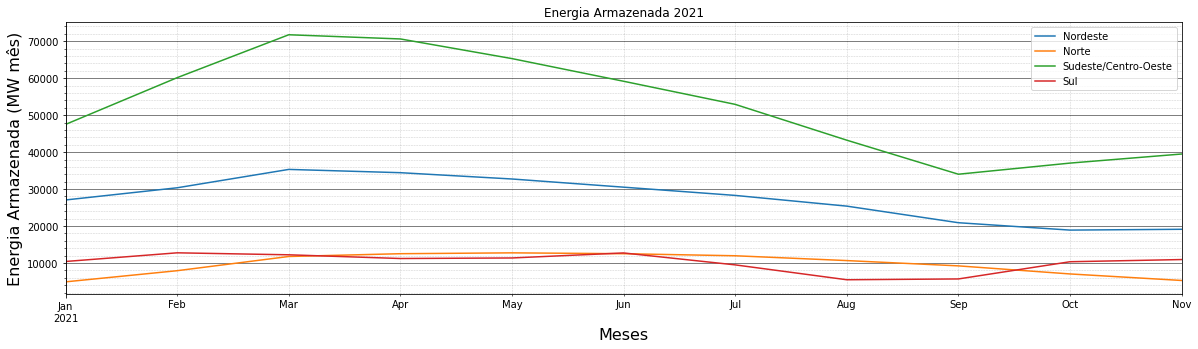

In [ ]:
fig, ax = plt.subplots()

ax = Custom_Ax(ax)

df_energia_armazenada_p.plot(kind='line', xlabel='Meses', ylabel='Energia Armazenada (MW mês)', figsize=(20,5), grid=True, legend=True, ax=ax, title='Energia Armazenada 2021') \
                   .legend(loc='best')

Em outubro, devido as chuvas, o armazenamento de energia parou de desempenhar uma queda, que continuou no mês seguinte, muito graças e além da regularização da chuvas, ao operador do sistema não diminuir a geração de energia termoelétrica, que continua a ser empregada em novembro e provavelmente dezembro.

## Fontes de Geração de Energia 2021 e 2001



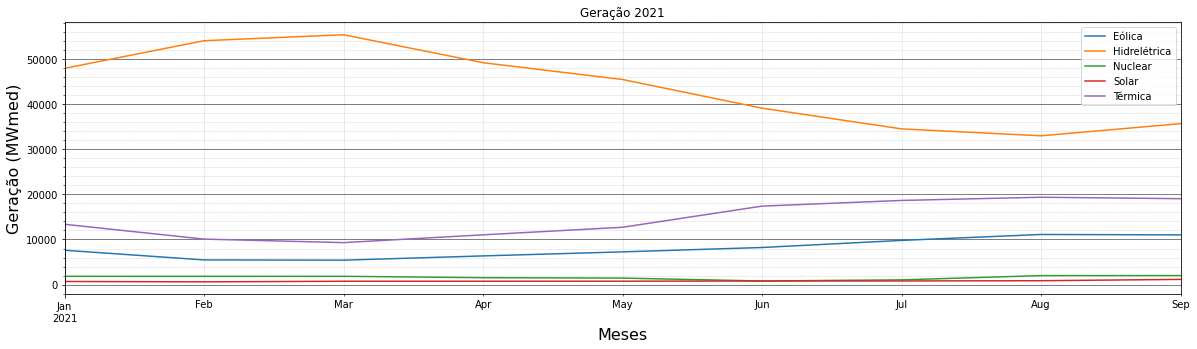

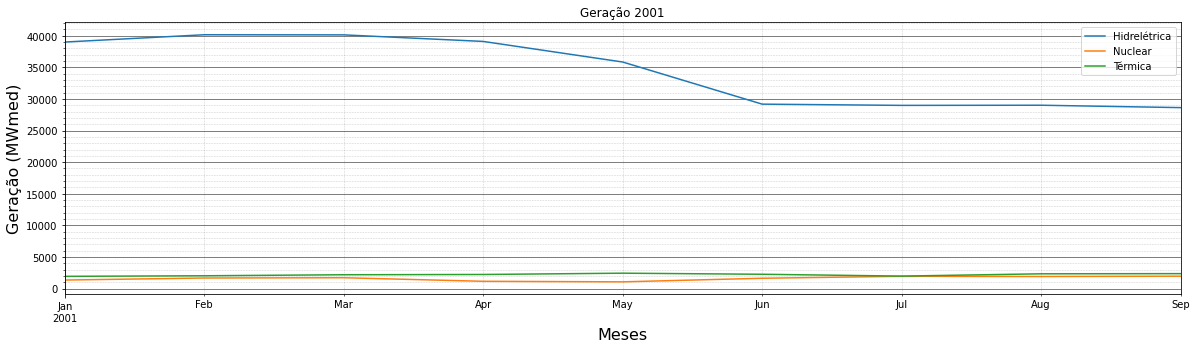

In [ ]:
df_2021 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Geração_de_Energia_Semana_data 2021.csv', sep=';')

df_2021.columns = df_2021.columns.str.replace(' ', '_')

df_2021.dropna(axis='index', subset=['Data_Escala_de_Tempo_1_GE_Comp_3'],  inplace=True)

df_2021.Selecione_Tipo_de_GE_Comp_3 = df_2021.Selecione_Tipo_de_GE_Comp_3.str.replace(',', '.')

df_2021.Data_Dica_Comp = pd.to_datetime(df_2021.Data_Dica_Comp, format='%m/%Y')

df_2021.Selecione_Tipo_de_GE_Comp_3 = df_2021.Selecione_Tipo_de_GE_Comp_3.astype(float)


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = pd.pivot_table(df_2021.reset_index(),
                    columns='Selecione_Comparar_GE_Comp_3', index='Data_Dica_Comp', values='Selecione_Tipo_de_GE_Comp_3') \
                    .plot(kind='line', xlabel='Meses', ylabel='Geração (MWmed)', figsize=(20,5), grid=True, legend=True, ax=ax, title='Geração 2021') \
                    .legend(loc='best')


df_2001 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Geração_de_Energia_Semana_data 2001.csv', sep=';')

df_2001.columns = df_2001.columns.str.replace(' ', '_')

df_2001.dropna(axis='index', subset=['Data_Escala_de_Tempo_1_GE_Comp_3'],  inplace=True)

df_2001.Selecione_Tipo_de_GE_Comp_3 = \
        df_2001.Selecione_Tipo_de_GE_Comp_3.str.replace(',', '.')

df_2001.Selecione_Tipo_de_GE_Comp_3 = \
        df_2001.Selecione_Tipo_de_GE_Comp_3.astype(float)

df_2001.Data_Dica_Comp = pd.to_datetime(df_2001.Data_Dica_Comp, format='%m/%Y')


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = pd.pivot_table(df_2001.reset_index(),
                    columns='Selecione_Comparar_GE_Comp_3', index='Data_Dica_Comp', values='Selecione_Tipo_de_GE_Comp_3')\
                    .plot(kind='line', xlabel='Meses', ylabel='Geração (MWmed)', figsize=(20,5), grid=True, legend=True, ax=ax, title='Geração 2001')\
                    .legend(loc='best')

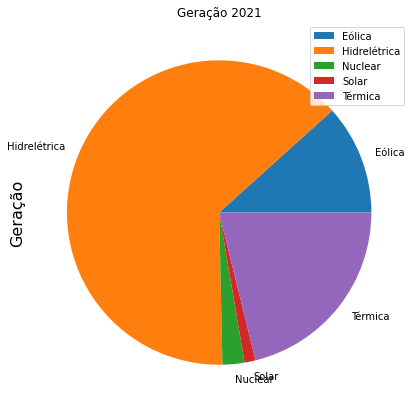

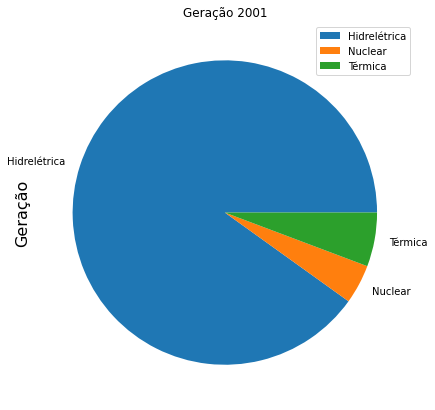

In [ ]:
fig, ax = plt.subplots()

ax = Custom_Ax(ax)

df_2021 = df_2021.rename(columns={'Selecione_Tipo_de_GE_Comp_3': 'Geração'})

ax = df_2021.groupby(['Selecione_Comparar_GE_Comp_3']).sum().plot(kind='pie', y='Geração', title='Geração 2021', figsize=(7,7), ax=ax).legend(loc='best')


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

df_2001 = df_2001.rename(columns={'Selecione_Tipo_de_GE_Comp_3': 'Geração'})

ax = df_2001.groupby(['Selecione_Comparar_GE_Comp_3']).sum().plot(kind='pie', y='Geração',title='Geração 2001', figsize=(7,7), ax=ax).legend(loc='best')

Afim de análisar o comportamento do sitemas de energia brasileiro, pode-se descatar os anos de 2021 e 2001, anos em que a críse hidrica foi mais acentuada. Então destaca-se uma comparação entre a geração de Energia Elétrica de 2021 e de 2001 (ano do racionamento de energia elétrica no Brasil), pode-se destacar que a capacidade de geração de energia e a pluraridade de fontes de geração foram aumentando com o passar dos anos (2001-2021), como consequência temos um sistema mais robusto, capaz rearranjar as diferentes fontes de maneira a lidar com as crises de energia.

Especificamente de 2021, é possível observar que a geração termoelétrica não atuante durante os meses de Abril e Maio, começou a ser empregada para lidar com a falta de recurso hidríco, com isso minimizando os efeitos do período seco, mas tendo um alto impacto no preço, já que o preço de energia termoelétrica é bastante superior a geração hidrica, que tem custo de insumo zero.

## Carga no Sistema Elétrico


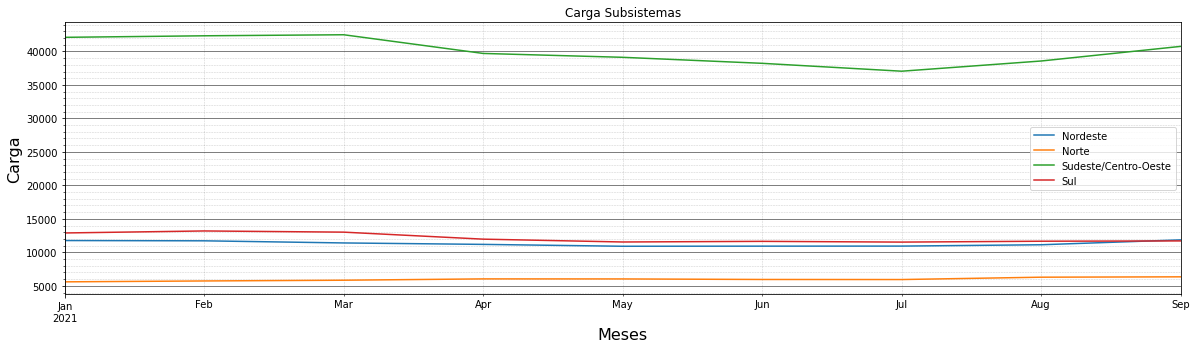

In [ ]:
df_carga = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Carga_de_Energia_Mês_data.csv',sep=';')

df_carga.columns = df_carga.columns.str.replace(' ', '_')

df_carga.Selecione_Tipo_de_CE_Comp_3 = df_carga.Selecione_Tipo_de_CE_Comp_3.str.replace(',', '.')

df_carga.Data_Escala_de_Tempo_1_CE_Comp_3	 = pd.to_datetime(df_carga.Data_Escala_de_Tempo_1_CE_Comp_3, format='%d/%m/%Y %H:%M:%S').dt.strftime('%m/%Y')

df_carga.Data_Escala_de_Tempo_1_CE_Comp_3	 = pd.to_datetime(df_carga.Data_Escala_de_Tempo_1_CE_Comp_3, format='%m/%Y')

df_carga.Selecione_Tipo_de_CE_Comp_3 = df_carga.Selecione_Tipo_de_CE_Comp_3.astype(float)


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = pd.pivot_table(df_carga,
                    columns='Subsistema', index='Data_Escala_de_Tempo_1_CE_Comp_3', values='Selecione_Tipo_de_CE_Comp_3')\
                    .plot(kind='line', xlabel='Meses', ylabel='Carga', figsize=(20,5), grid=True, legend=True, ax=ax, title='Carga Subsistemas')\
                    .legend(loc='best')



Apesar do crescimento do consumo de energia em relação ao mês de Abril do ao de 2020, as retrições devido ao coronavirus fizeram com que a carga não tivesse grande acréscimo em Abril de 2021 e também estimulos do governo a redução voluntaria da demanda iniciada em Julho. Neste momento os agentes já entravam em sinais de alerta, pois o período úmido de chuvas demoraria até Novembro para se concretizar no armazenamento, podendo criar problemas de operação em algumas hidroelétricas, devido a baixa em seus reservatórios.

In [ ]:
df_intercambioenergia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Intercâmbio_de_Energia_Dia_data.csv',sep=';')

df_intercambioenergia.columns = df_intercambioenergia.columns.str.replace(' ','_')

df_intercambioenergia.columns = df_intercambioenergia.columns.str.replace('-','')

df_intercambioenergia['Data'] = pd.to_datetime(df_intercambioenergia.Data_Escala_de_Tempo_1_IE_Comp_3.astype(str),format='%d/%m/%Y %H:%M:%S')

df_intercambioenergia = df_intercambioenergia.set_index('Data')

df_intercambioenergia = df_intercambioenergia.drop(columns=['Data_Escala_de_Tempo_1_IE_Comp_3', 
                                                            'Data_Escala_de_Tempo_1_IE_Comp_3_Hora','Data_Escala_de_Tempo_1_IE_Comp_3.1','Origem__Destino.1',
                                                            'Período_Exibido_IE'])

df_intercambioenergia = df_intercambioenergia.rename(columns={'Origem__Destino':'Origem Destino'})

df_intercambioenergia.Selecione_Tipo_de_Intercambio_de_Energia_IE_Comp_3 = df_intercambioenergia.Selecione_Tipo_de_Intercambio_de_Energia_IE_Comp_3.str.replace(',','.')

df_intercambioenergia.Selecione_Tipo_de_Intercambio_de_Energia_IE_Comp_3 = df_intercambioenergia.Selecione_Tipo_de_Intercambio_de_Energia_IE_Comp_3.astype('float')

df_intercambioenergia = df_intercambioenergia.groupby('Origem Destino').resample('M').sum()

df_intercambioenergia = df_intercambioenergia.unstack(0)

df_intercambioenergia.columns = df_intercambioenergia.columns.droplevel(0)

df_intercambioenergia

Origem Destino,Nordeste,Norte,SIN,Sudeste/Centro-Oeste,Sul
Data,,,,,
2021-01-31,65083.549542,111458.388083,-27234.62,-101322.192708,-102454.402770
2021-02-28,-41261.572542,194466.239542,-26097.17,-95813.641167,-83488.213752
2021-03-31,-85274.562500,373644.539500,-2972.41,-148653.227542,-142689.161125
2021-04-30,-28612.171833,341078.311167,-1466.98,-127993.220333,-185939.892124
2021-05-31,23774.281708,299048.864500,454.85,-106200.913417,-216167.384292
2021-06-30,101213.051958,106332.425125,-12226.80,-104503.162917,-115269.100833
2021-07-31,168149.083333,40183.006458,-19121.24,-205766.629708,-21686.705917
2021-08-31,225525.891250,23061.772292,-41481.92,-237074.548833,-52994.996375
2021-09-30,237740.491917,16336.614042,-52963.77,-265397.099000,-41643.766583


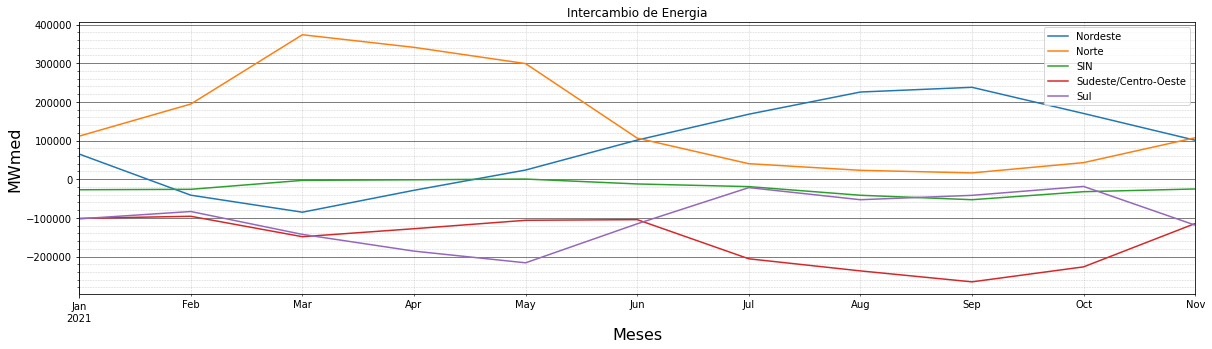

In [ ]:
fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = df_intercambioenergia.plot(kind='line',ax=ax, figsize=(20,5), grid=True, legend=True, title='Intercambio de Energia', xlabel='Meses', ylabel='MWmed').legend(loc='best')

A maior carga de energia do SIN se encontra no Subsistema Sudeste, e levando em consideração o desenvolvimento do sistema de transmissão brasileiro nos últimos anos, foi possível transportar um grande bloco de energia  do Subsistema Nordeste para o Subsistema Sudeste a partir de Junho e Julho, com objetivo de conter/amenizar a queda dos níveis de reservatórios, estes entrando em niveis bastante críticos no final de setembro e inicio de outubro na região sudeste.

## Energia Natural Afluente

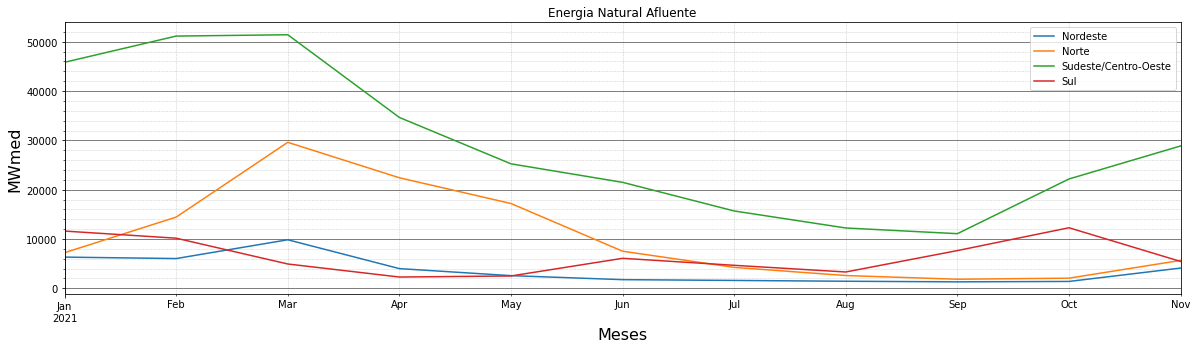

In [ ]:
df_energianaturalafluente = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Comparativo_Energia_Natural_Afluente_Subsistema_Mês_data.csv',sep=';')

df_energianaturalafluente.columns = df_energianaturalafluente.columns.str.replace(' ','_')

df_energianaturalafluente.Data_Escala_de_Tempo_1_ENAS_Comp_3 = pd.to_datetime(df_energianaturalafluente.Data_Escala_de_Tempo_1_ENAS_Comp_3.astype(str), 
                                                                              format='%d/%m/%Y %H:%M:%S')

df_energianaturalafluente.Data_Escala_de_Tempo_1_ENAS_Comp_3 = pd.to_datetime(df_energianaturalafluente.Data_Escala_de_Tempo_1_ENAS_Comp_3, 
                                                                              format='%m/%Y')

df_energianaturalafluente = df_energianaturalafluente.set_index('Data_Escala_de_Tempo_1_ENAS_Comp_3')

df_energianaturalafluente = df_energianaturalafluente.drop(columns=['Mês_de_Data_Escala_de_Tempo_1_ENAS_Comp_3', 
                            'Data_do_Incio_da_Semana_Din_Instante_ENAS_Comp_3', 'Período_Exibido_ENAS', 'Subsistema.1', 'Texto_Data_Incio_da_Semana_Din_Instante_ENAS'])

df_energianaturalafluente.Selecione_Tipo_de_ENAS_Comp_3 = df_energianaturalafluente.Selecione_Tipo_de_ENAS_Comp_3.str.replace(',','.')

df_energianaturalafluente.Selecione_Tipo_de_ENAS_Comp_3 = df_energianaturalafluente.Selecione_Tipo_de_ENAS_Comp_3.astype(float)


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = pd.pivot_table(df_energianaturalafluente,
                    columns='Subsistema', index='Data_Escala_de_Tempo_1_ENAS_Comp_3', values='Selecione_Tipo_de_ENAS_Comp_3')\
                    .plot(kind='line', xlabel='Meses', ylabel='MWmed', figsize=(20,5), grid=True, legend=True, ax=ax, title='Energia Natural Afluente')\
                    .legend(loc='best')

Energia Natural Afluente (ENA) é energia elétrica que pode ser gerada a partir da vazão natural de um determinado rio ou subsistema, graças a chuvas recebidas em outubro, tivemos uma quebra no periodo seco, entrando em um periódo de chuvas, que amenizou a críse.

## Preços de Energia

### Preço de Liquidação das Diferenças (PLD)

Com o aumento da geração termoelétrica, como consequência da falta de recurso hidrico, tem um efeito no preço horário de liquidação das diferentes no Mercado Livre de Energia. Em Junho, quando as termicas começam a ser despachadas, o PLD tem um acrecimo se valor. No gráfico temos o valor dos três subsistemas. Pode-se observa que o PLD passa de proximo a R\$ 250.00 para proximo de R\$ 350.00 em Julho, se aproximando dos R\$ 600.00 em Julho.

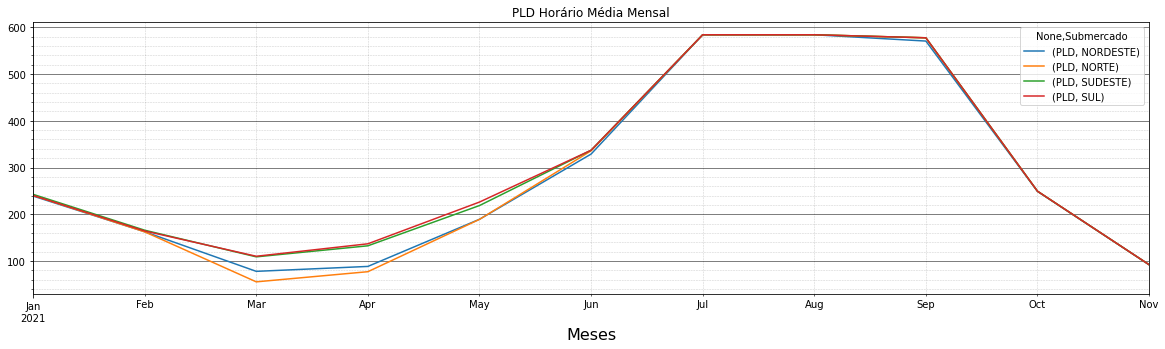

In [ ]:
df_pld = pd.read_html('/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Histórico do Preço Horário 17 de abril de 2018 a 27 de novembro de 2021.xls', 
                      decimal=',', thousands='.')[0]

for col in df_pld.columns:
  if(type(df_pld[col]) == 'string'):
    df_pld.col = df_pld.col.str.replace(',', '.')

df_pld = df_pld.melt(id_vars=['Hora','Submercado'], var_name="Date", 
        value_name="PLD", ignore_index=False)

df_pld['DateHora'] = pd.to_datetime(df_pld.Date.astype(str)+' '+df_pld.Hora.astype(str),format='%d/%m/%Y %H')

df_pld = df_pld.set_index('DateHora')

df_pld = df_pld.drop(columns=['Date', 'Hora'])

df_pld = df_pld.groupby('Submercado').resample('M').mean()

df_pld = df_pld.unstack(0)


fig, ax = plt.subplots()

ax = Custom_Ax(ax)

df_pld = df_pld.loc[df_pld.index >= '2021-01-01']

ax = df_pld.plot(ax=ax, figsize=(20,5), grid=True, title='PLD Horário Média Mensal', xlabel='Meses')

### Custo Marginal de Operação

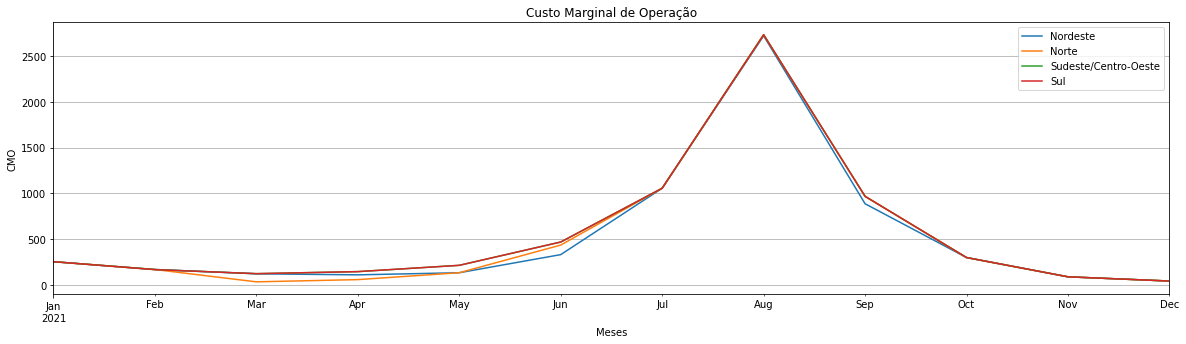

In [ ]:
df_cmo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crise Hidrica/Custo_Marginal_Operação_(CMO)_-_Médio_Semanal_data.csv',sep=';')

df_cmo.columns = df_cmo.columns.str.replace(' ', '_')

df_cmo.dropna(axis='index', subset=['Semana_de_Data_Escala_de_Tempo_1_CMO'],  inplace=True)

df_cmo.Data_do_Incio_da_Semana_Din_Instante_CMO	 = pd.to_datetime(df_cmo.Data_do_Incio_da_Semana_Din_Instante_CMO	,format='%m/%d/%Y')

df_cmo = df_cmo.set_index('Data_do_Incio_da_Semana_Din_Instante_CMO')

df_cmo = df_cmo.drop(['Semana_de_Data_Escala_de_Tempo_1_CMO', 'Data_Escala_de_Tempo_1_CMO', 'Período_Exibido_CMO', 'Texto_Data_do_Incio_da_Semana_Din_Instante_CMO'],axis=1)

df_cmo.Média_Semanal = df_cmo.Média_Semanal.str.replace(',', '.')

df_cmo.Média_Semanal = df_cmo.Média_Semanal.astype(float)

df_cmo = df_cmo.rename(columns={'Média_Semanal':'CMO'})

df_cmo = df_cmo.groupby('Subsistema').resample('M').mean()


fig, ax = plt.subplots()

ax = pd.pivot_table(df_cmo.reset_index(),
                    columns='Subsistema', index='Data_do_Incio_da_Semana_Din_Instante_CMO', values='CMO')\
                    .plot(kind='line', xlabel='Meses', ylabel='CMO', figsize=(20,5), grid=True, legend=True, ax=ax, title='Custo Marginal de Operação')\
                    .legend(loc='best')


df_cmo = df_cmo.unstack(0)

O Custo Marginal de Operação é o custo de energia calculado/estimado pelos modelos de despacho de energia, o Preço de Liquidação das Diferenças é o preço que a energia é liquidada no mercado de curto prazo no mercado de energia, e sofre influência de corte máximo e mínimo estimulado pela Agência Nacional de Energia Elétrica. 

In [ ]:
df_pldcmo = pd.merge(df_pld, df_cmo, left_index=True, right_index=True)

df_pldcmo.index = pd.to_datetime(df_pldcmo.index, format='%Y/%m/%d').strftime('%b')

df_pldcmo = df_pldcmo.rename(columns={'NORDESTE':'Nordeste', 'NORTE':'Norte', 'SUDESTE':'Sudeste/Centro-Oeste', 'SUL':'Sul'})

df_pldcmo

PLD              ...                  CMO           
Submercado    Nordeste       Norte  ... Sudeste/Centro-Oeste        Sul
Jan         239.018266  240.397379  ...             253.0760   253.0760
Feb         162.684628  162.499658  ...             167.5250   166.4350
Mar          78.015121   55.573401  ...             122.2125   122.2125
Apr          88.551722   77.268806  ...             144.5340   144.5340
May         189.321761  189.115188  ...             213.3575   213.3575
Jun         328.755944  335.722583  ...             468.2075   468.2075
Jul         583.879261  583.879409  ...            1056.1460  1056.1460
Aug         583.880390  583.879906  ...            2733.8800  2733.8800
Sep         570.388861  577.370000  ...             967.4700   967.4700
Oct         248.967849  249.364798  ...             298.3820   298.3820
Nov          92.243056   92.273997  ...              87.7175    87.7175

[11 rows x 8 columns]

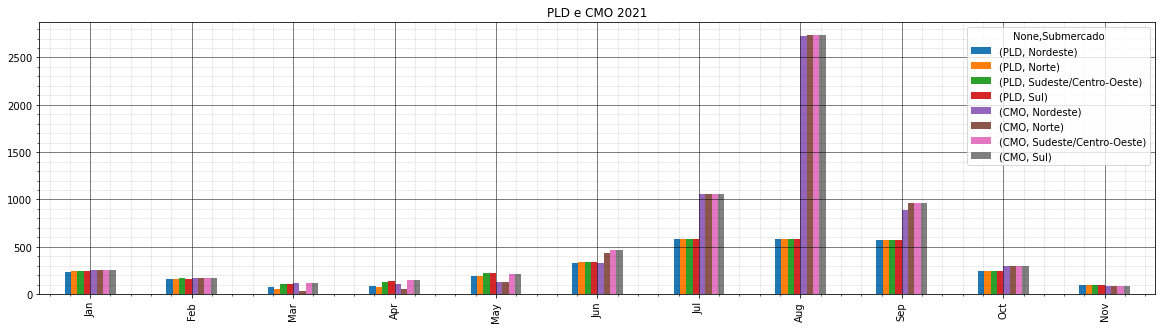

In [ ]:
fig, ax = plt.subplots()

ax = Custom_Ax(ax)

ax = df_pldcmo.plot(kind='bar', title='PLD e CMO 2021', figsize=(20,5), grid=True, legend=True, ax=ax)

Em Julho, Agosto e Setembro, onde a crise hídrica teve seu estado mais grave, e a energia armazenada nos reservatórios chegou a niveis mais críticos, o CMO teve um aumento bastante expressivo, chegando a patamares de R\$2500,00 e sendo o seu valor aparado pelo PLD máximo, fixado pela ANEEL (Agência Nacional de Energia Elétrica), proximo a R\$600,00.

Observa-se o quanto a críse hidrica, a baixa dos reservatórios no período seco, impacta fortemente os modelos de despacho, e consequentemente aumentando o valor do PLD durante a baixa na cota e energia armazenada nos reservatórios. A partir de outubro, onde alguns dos mais importantes reservatórios como Nova Ponte e Funras tiveram pequena recuperação graças ao inicio desse periodo úmido o PLD começa a ter o seu valor reduzido, retornando a valores próximos ao do inicio do ano. Ressalta-se que o gráfico mostra a média mensal do PLD Horário.